## Importing the data and necessary Libraries

In [1]:
from sklearn.datasets import load_boston
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = load_boston()

## Creating and Analysing the dataset

In [3]:
df = pd.DataFrame(data['data'], columns=data['feature_names'])

In [4]:
df['Target'] = data.target

In [5]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Target     0
dtype: int64

In [8]:
df.shape

(506, 14)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Target   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


<AxesSubplot:>

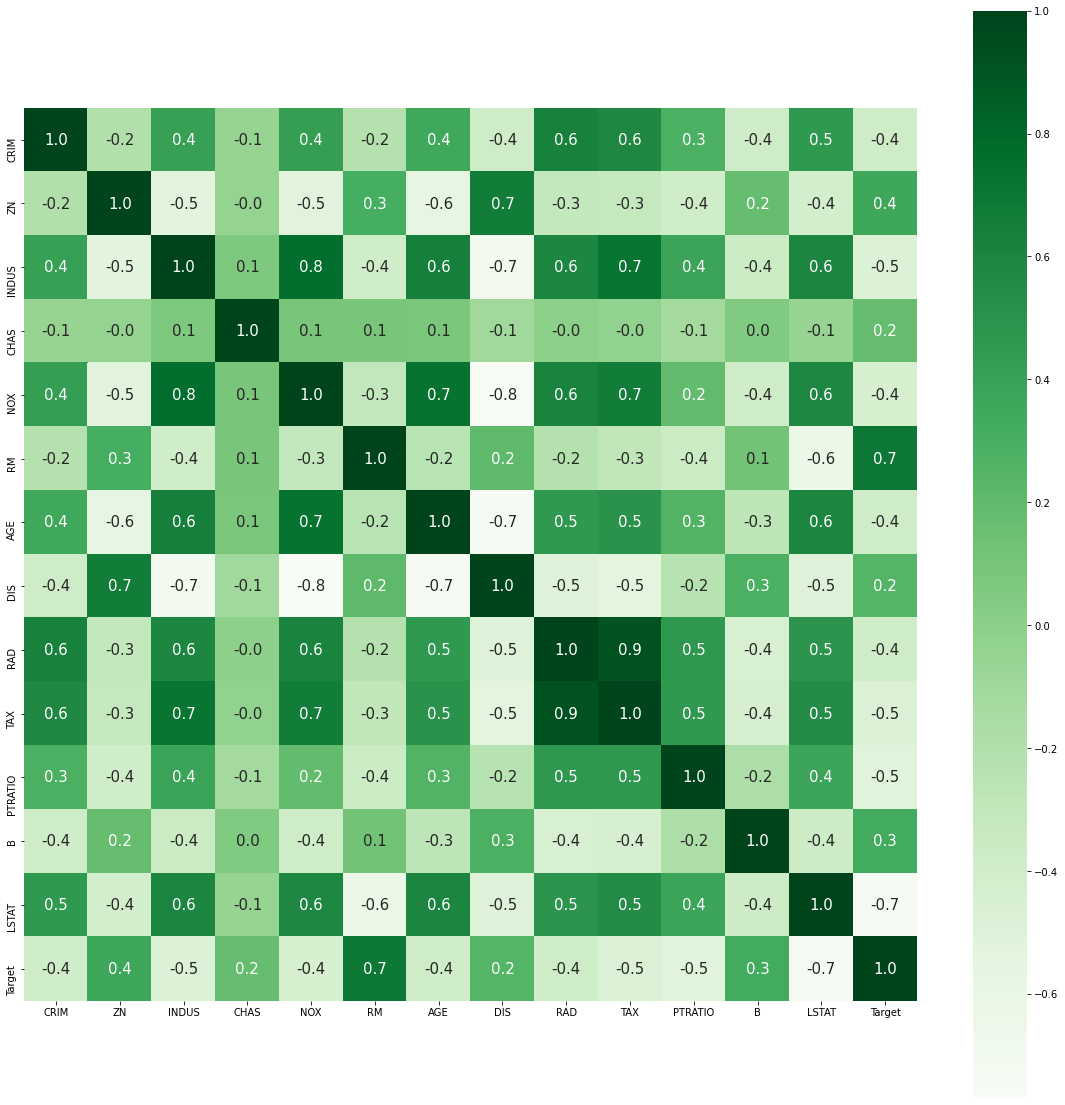

In [10]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')

## Preparing the data for modelling

In [11]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline

In [12]:
X = df.drop('Target',axis=1)
y = df['Target']

In [13]:
print(df.shape)
print(X.shape)
print(y.shape)

(506, 14)
(506, 13)
(506,)


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [15]:
print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)

X_train:  (404, 13)
X_test:  (102, 13)
y_train:  (404,)
y_test:  (102,)


## Building the model and visualising the regression line

In [16]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [17]:
print("Intercept: ", regressor.intercept_)

Intercept:  35.81332208853556


In [18]:
coeff_df = pd.DataFrame(regressor.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
CRIM,-0.108017
ZN,0.046228
INDUS,0.016401
CHAS,2.786931
NOX,-17.958808
RM,3.996436
AGE,0.006351
DIS,-1.525717
RAD,0.278924
TAX,-0.011338


In [19]:
pred_linreg = regressor.predict(X_test)

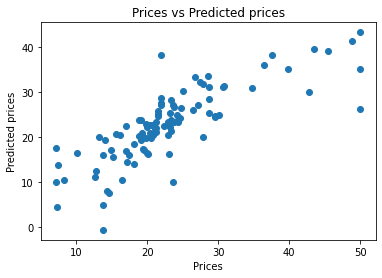

In [20]:
plt.scatter(y_test,pred_linreg)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

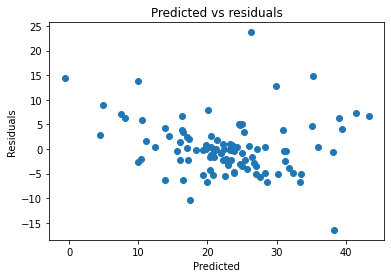

In [21]:
plt.scatter(pred_linreg,y_test-pred_linreg)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of the predicted values')

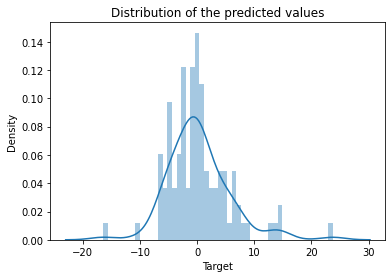

In [22]:
sns.distplot((y_test-pred_linreg),bins=50)
plt.title("Distribution of the predicted values")

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


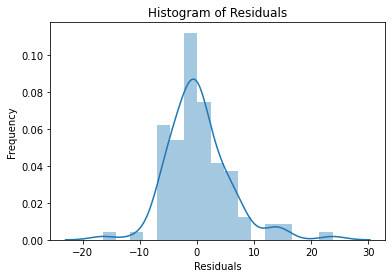

In [23]:
sns.distplot(y_test-pred_linreg)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

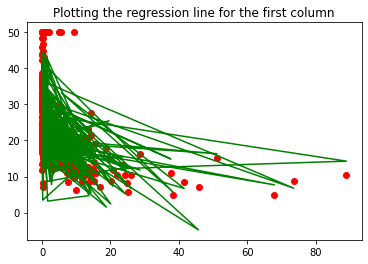

In [24]:
plt.scatter(X_train.iloc[:,0], y_train, color = 'red')
plt.plot(X_train.iloc[:, 0], regressor.predict(X_train), color = 'green')
plt.title("Plotting the regression line for the first column")
plt.show()

## Evaluating the model

In [25]:
from sklearn import metrics
import numpy as np 

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred_linreg))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred_linreg))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred_linreg)))
print('R^2:',metrics.r2_score(y_test, pred_linreg))

Mean Absolute Error: 3.8084774840566635
Mean Squared Error: 30.03271520372967
Root Mean Squared Error: 5.48021123714494
R^2: 0.6314067926252149


In [26]:
regressor.score(X_test, y_test)

0.6314067926252149

## Computing SSE for classifing a random new sample

In [48]:
import random
n = random.randint(0,101)
print("Sample number: ", n)

Sample number:  72


In [49]:
sse = np.square(y_test.iloc[n] - pred_linreg[n])
print("The mean squared error is: ", sse)
print("Actual value is: ", y_test.iloc[n])
print("Predicted value is: ", pred_linreg[n])

The mean squared error is:  21.482564045573003
Actual value is:  39.8
Predicted value is:  35.1650713009181
